In [1]:
import mlrose_hiive as mlrose
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

In [2]:
random_state = 2020
max_attempts = 50
max_iters = 1000
N = 10
length_state = 10
init_states = [np.random.randint(2, size=length_state) for x in range(N)]
fitness = mlrose.FlipFlop()
print(f'optimal fitness is {length_state - 1}')

optimal fitness is 9


### Random hill climbing

In [3]:
optimal_fitness_list = []
avg_fitness_evals_list = []
average_time_taken_list = []
params_list = []
for restarts in [10, 50, 100]:
    start_time = time.time()
    best_states = []
    best_fitnesses = []
    curves = []
    for idx, init_state in enumerate(init_states):

        problem = mlrose.DiscreteOpt(length = length_state, fitness_fn = fitness, maximize=True, max_val=2)
        best_state, best_fitness, curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters = max_iters, restarts = restarts,
                                                                   init_state = init_state, curve = True, random_state = random_state + idx)
        best_states.append(best_state)
        best_fitnesses.append(best_fitness)
        curves.append(curve)
        
    end_time = time.time()
    total_time = round(end_time - start_time, 5)
    
    average_time_taken = round(total_time / N, 5)
    average_best_fitness = np.mean(best_fitnesses)
    avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N)
    
    params_list.append(f'restarts={restarts}')
    avg_fitness_evals_list.append(avg_fitness_evals)
    optimal_fitness_list.append(average_best_fitness)
    average_time_taken_list.append(average_time_taken)
    
    print(f'------- restarts = {restarts}, total_time = {total_time} -------')
#     print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#     print(f'The average fitness at the best state is {average_best_fitness}')
#     print('\n')
    
rhc_dict = {'params': params_list,
            'fitness_eval': avg_fitness_evals_list,
            'best_fitness': optimal_fitness_list,
            'average_time_taken': average_time_taken_list}

------- restarts = 10, total_time = 0.32662 -------
------- restarts = 50, total_time = 1.50565 -------
------- restarts = 100, total_time = 2.7016 -------


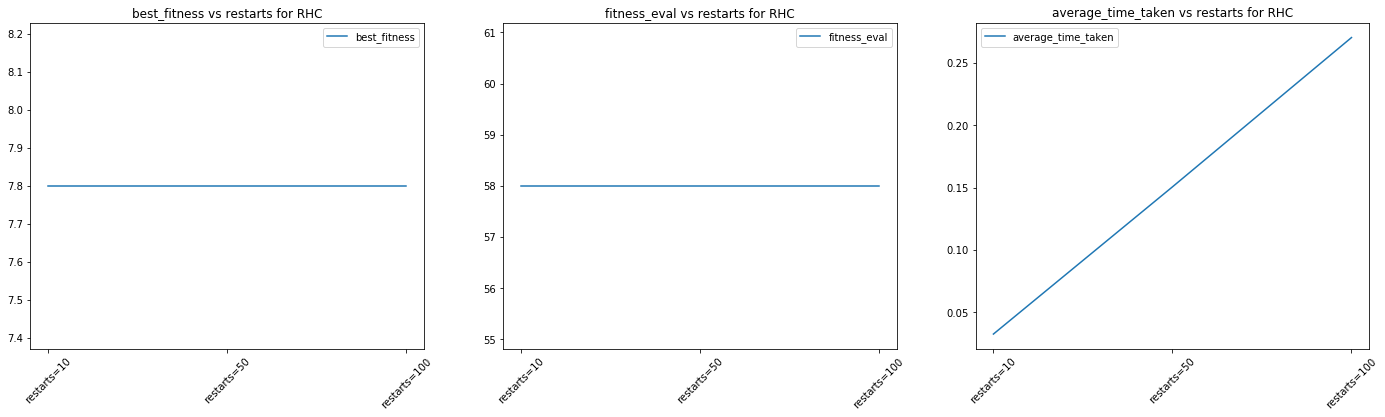

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = rhc_dict.copy()
temp_dict.pop('params')
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):
    ax.set_title(f"{key} vs restarts for RHC")
    ax.plot(rhc_dict['params'], rhc_dict[key], label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
plt.show()

### Simulated annealing

In [5]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for exp_const in [0.001, 0.005, 0.01]:
    for init_temp in [0.1, 0.5, 1.0]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for init_state in init_states:
            schedule = mlrose.ExpDecay(init_temp = init_temp, exp_const = exp_const)
            problem = mlrose.DiscreteOpt(length = length_state, fitness_fn = fitness, maximize=True, max_val=2)
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = max_attempts, 
                                                                         max_iters = max_iters, init_state = init_state, curve=True,
                                                                         random_state = random_state)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)
        
        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N)

        params_list.append(f'exp_const={exp_const}_init_temp={init_temp}')
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
    
        print(f'------- exp_const = {exp_const}, init_temp = {init_temp}, total_time = {total_time} -------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
        
sa_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

------- exp_const = 0.001, init_temp = 0.1, total_time = 0.06702 -------
------- exp_const = 0.001, init_temp = 0.5, total_time = 0.12865 -------
------- exp_const = 0.001, init_temp = 1.0, total_time = 0.67496 -------
------- exp_const = 0.005, init_temp = 0.1, total_time = 0.06682 -------
------- exp_const = 0.005, init_temp = 0.5, total_time = 0.06905 -------
------- exp_const = 0.005, init_temp = 1.0, total_time = 0.16244 -------
------- exp_const = 0.01, init_temp = 0.1, total_time = 0.06629 -------
------- exp_const = 0.01, init_temp = 0.5, total_time = 0.0688 -------
------- exp_const = 0.01, init_temp = 1.0, total_time = 0.11397 -------


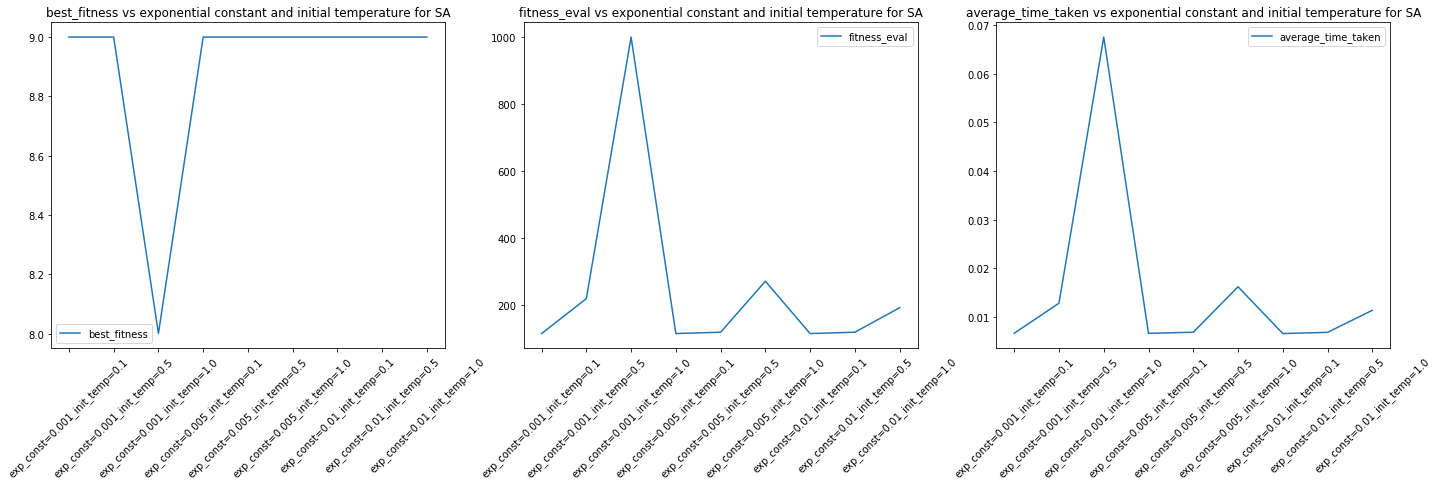

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = sa_dict.copy()
temp_dict.pop('params')
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):
    ax.set_title(f"{key} vs exponential constant and initial temperature for SA")
    ax.plot(sa_dict['params'], sa_dict[key], label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Genetic Algorithm

In [7]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for pop_size in [50, 100, 200]:
    for mutation_prob in [0.2, 0.4, 0.6, 0.8]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for idx, init_state in enumerate(init_states):
            problem = mlrose.DiscreteOpt(length = length_state, fitness_fn = fitness, maximize=True, max_val=2)
            best_state, best_fitness, curve = mlrose.genetic_alg(problem, pop_size = pop_size, mutation_prob = mutation_prob,
                                                                 max_attempts = max_attempts, max_iters = max_iters,
                                                                 curve=True, random_state=random_state + idx)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)

        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N) * pop_size
        params_list.append(f'pop_size={pop_size}_mutation_prob={mutation_prob}')
        
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
        
        print(f'----- pop_size = {pop_size}, mutation_prob = {mutation_prob}, total_time = {total_time} ------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
        
ga_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

----- pop_size = 50, mutation_prob = 0.2, total_time = 2.08452 ------
----- pop_size = 50, mutation_prob = 0.4, total_time = 2.17006 ------
----- pop_size = 50, mutation_prob = 0.6, total_time = 2.58573 ------
----- pop_size = 50, mutation_prob = 0.8, total_time = 2.51949 ------
----- pop_size = 100, mutation_prob = 0.2, total_time = 4.21922 ------
----- pop_size = 100, mutation_prob = 0.4, total_time = 4.48344 ------
----- pop_size = 100, mutation_prob = 0.6, total_time = 4.81446 ------
----- pop_size = 100, mutation_prob = 0.8, total_time = 4.56121 ------
----- pop_size = 200, mutation_prob = 0.2, total_time = 8.2887 ------
----- pop_size = 200, mutation_prob = 0.4, total_time = 8.51104 ------
----- pop_size = 200, mutation_prob = 0.6, total_time = 8.84406 ------
----- pop_size = 200, mutation_prob = 0.8, total_time = 9.00973 ------


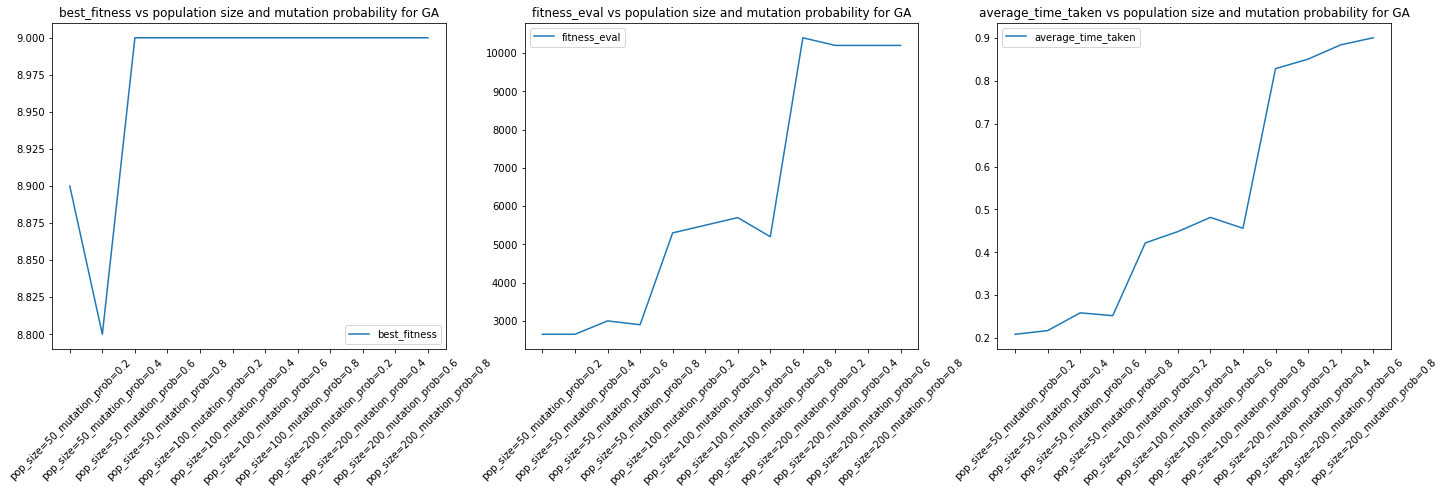

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = ga_dict.copy()
temp_dict.pop('params')
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):
    ax.set_title(f"{key} vs population size and mutation probability for GA")
    ax.plot(ga_dict['params'], ga_dict[key], label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Mimic

In [9]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for pop_size in [50, 100, 200]:
    for keep_pct in [0.01, 0.05, 0.1, 0.5]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for idx, init_state in enumerate(init_states):
            problem = mlrose.DiscreteOpt(length = length_state, fitness_fn = fitness, maximize=True, max_val=2)
            best_state, best_fitness, curve = mlrose.mimic(problem, pop_size=pop_size, keep_pct=keep_pct, max_attempts=max_attempts, max_iters=max_iters,
                                                           curve=True, random_state=random_state + idx)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)

        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N) * pop_size
        
        params_list.append(f'pop_size={pop_size}_keep_pct={keep_pct}')
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
        
        print(f'----- pop_size = {pop_size}, keep_pct = {keep_pct}, total_time = {total_time} ------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
    
mm_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

----- pop_size = 50, keep_pct = 0.01, total_time = 16.50177 ------
----- pop_size = 50, keep_pct = 0.05, total_time = 16.4661 ------
----- pop_size = 50, keep_pct = 0.1, total_time = 16.3866 ------
----- pop_size = 50, keep_pct = 0.5, total_time = 16.74277 ------
----- pop_size = 100, keep_pct = 0.01, total_time = 17.04161 ------
----- pop_size = 100, keep_pct = 0.05, total_time = 17.08913 ------
----- pop_size = 100, keep_pct = 0.1, total_time = 17.24786 ------
----- pop_size = 100, keep_pct = 0.5, total_time = 17.46353 ------
----- pop_size = 200, keep_pct = 0.01, total_time = 18.76074 ------
----- pop_size = 200, keep_pct = 0.05, total_time = 18.82088 ------
----- pop_size = 200, keep_pct = 0.1, total_time = 18.84315 ------
----- pop_size = 200, keep_pct = 0.5, total_time = 19.04027 ------


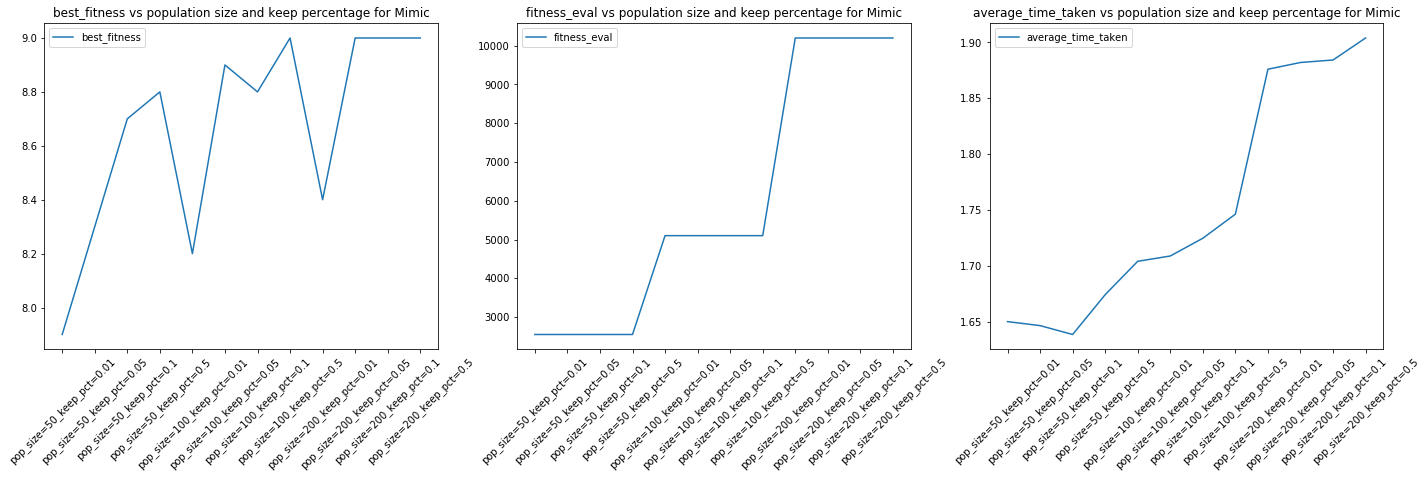

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = mm_dict.copy()
temp_dict.pop('params')
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):

    ax.set_title(f"{key} vs population size and keep percentage for Mimic")
    ax.plot(mm_dict['params'], mm_dict[key], label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Comparison

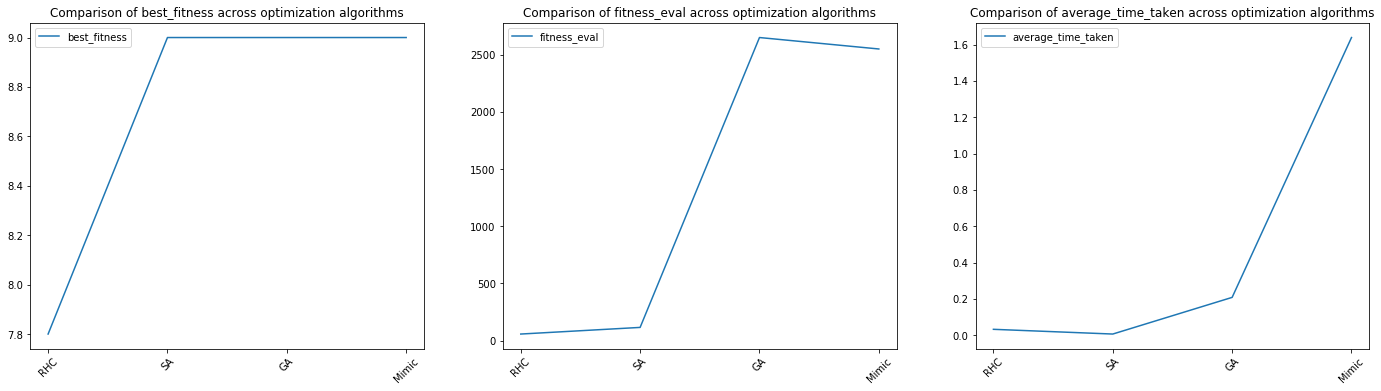

In [11]:
algorithms = ['RHC', 'SA', 'GA', 'Mimic']
algo_dict_list = [rhc_dict, sa_dict, ga_dict, mm_dict]
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):

    ax.set_title(f"Comparison of {key} across optimization algorithms")
    if key == 'best_fitness':
        optimal_metrics = [np.max(np.array(algo_dict[key])) for algo_dict in algo_dict_list]
    else:
        optimal_metrics = [np.min(np.array(algo_dict[key])) for algo_dict in algo_dict_list]
    ax.plot(algorithms, optimal_metrics, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
plt.show()